**Quantitative analysis using pynance and TaLib**

In [27]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_ta as ta
import pynance as pn

In [28]:
# Load your stock price data into a pandas DataFrame. Ensure your data includes columns like Open, High, Low, Close, and Volume.
data = pd.read_csv('AAPL_historical_data.csv')
print(data)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...           ...         ...         ...         ...         ...         ...   
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

          Volume  Dividends

In [29]:
# Apply Technical Analysis Indicators with pandas_ta
# Using pandas_ta to calculate technical indicators like averages, RSI, MACD

# Using Average indicator
adx_data = ta.adx(data['High'], data['Low'], data['Close'])
data = data.join(adx_data)

# Add Stochastic Oscillator
data[['stoch_k', 'stoch_d']] = ta.stoch(data['High'], data['Low'], data['Close'])

# Add MACD
data[['macd', 'macd_signal', 'macd_hist']] = ta.macd(data['Close'])

# Add RSI
data['rsi'] = ta.rsi(data['Close'])

# Print the DataFrame to see the indicators
print(data)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...           ...         ...         ...         ...         ...         ...   
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

          Volume  Dividends

In [49]:
# Use PyNance for Financial Metrics
# Calculate daily returns
# If 'Adj Close' column is not present, use 'Close' or rename it:
if 'Adj Close' not in data.columns:
    if 'Close' in data.columns:
        # Rename 'Close' to 'Adj Close' for compatibility with pynance
        data = data.rename(columns={'Close': 'Adj Close'})
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' column found in the DataFrame.")

data['daily_return'] = pn.tech.ret(data[['Adj Close']])  # Pass the DataFrame with 'Adj Close' column


# Calculate cumulative returns
data['cumulative_return'] = (1 + data['daily_return']).cumprod()

# Calculate volatility (rolling standard deviation of returns)
data['volatility'] = data['daily_return'].rolling(window=14).std()

# Example: Calculate Sharpe Ratio (annualized)
risk_free_rate = 0.02  # Assuming a 2% risk-free rate
annualized_return = data['daily_return'].mean() * 252
annualized_volatility = data['daily_return'].std() * (252 ** 0.5)
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

print("\nSharpe Ratio (Annualized):", sharpe_ratio)

print("\nData with Financial Metrics:")
print(data.head())


Sharpe Ratio (Annualized): 0.5786348704691531

Data with Financial Metrics:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  daily_return  cumulative_return  volatility  
0        0.0           0.0           NaN                NaN         NaN  
1        0.0           0.0     -0.052171           0.947829         NaN  
2        0.0           0.0     -0.073398           0.878261         NaN  
3        0.0           0.0      0.024751           0.899999         NaN  
4        0.0           0.0      0.028992           0.926091         NaN  


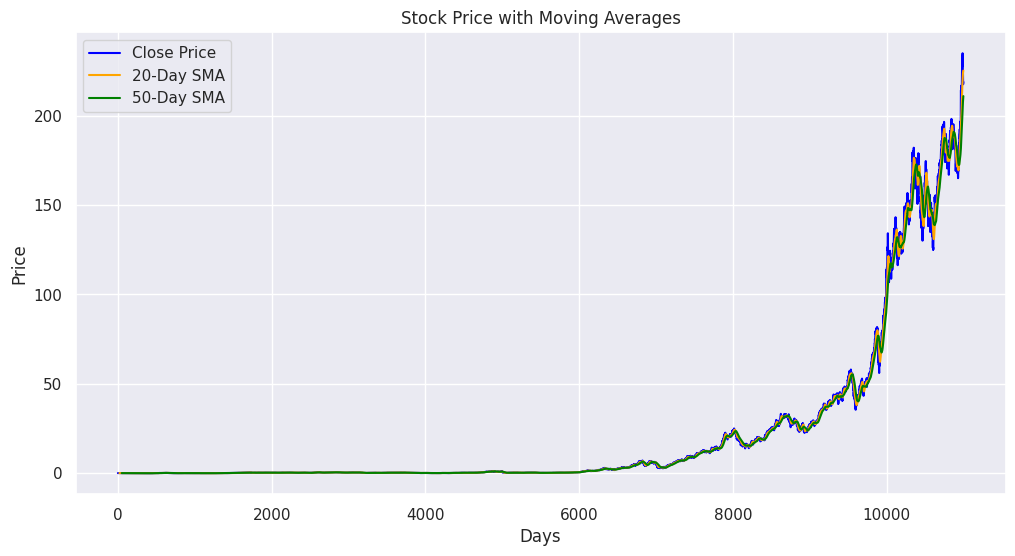

In [47]:
# Visualize the Data
sns.set_theme(style='darkgrid')

# Plot 1: Stock Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Close'].rolling(window=20).mean(), label='20-Day SMA', color='orange')
plt.plot(data['Close'].rolling(window=50).mean(), label='50-Day SMA', color='green')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

   macd  macd_signal  macd_hist
0   NaN          NaN        NaN
1   NaN          NaN        NaN
2   NaN          NaN        NaN
3   NaN          NaN        NaN
4   NaN          NaN        NaN


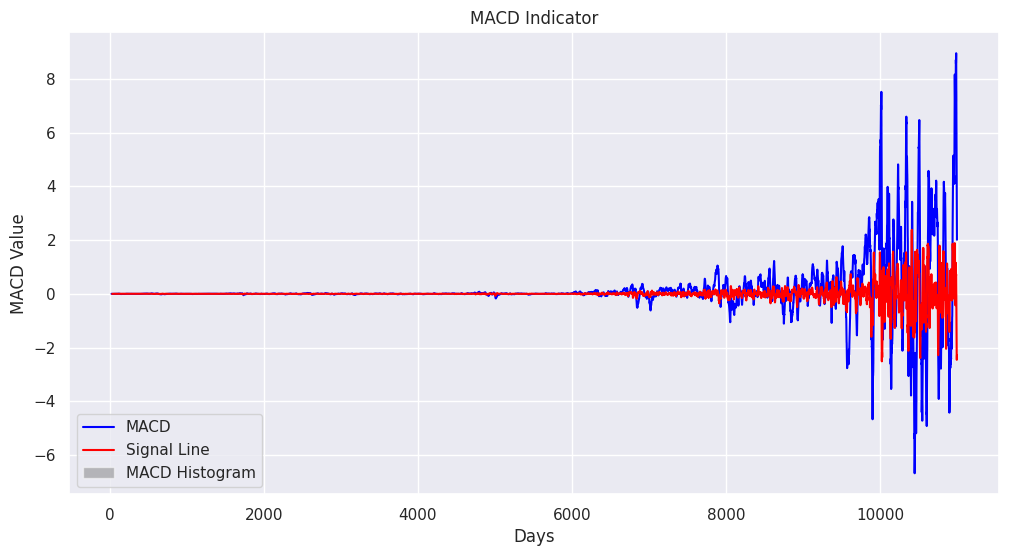

In [56]:
# Plot 2: MACD
# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(data['macd'], label='MACD', color='blue')
plt.plot(data['macd_signal'], label='Signal Line', color='red')
plt.bar(data.index, data['macd_hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title("MACD Indicator")
plt.xlabel("Days")
plt.ylabel("MACD Value")
plt.legend()
plt.show()

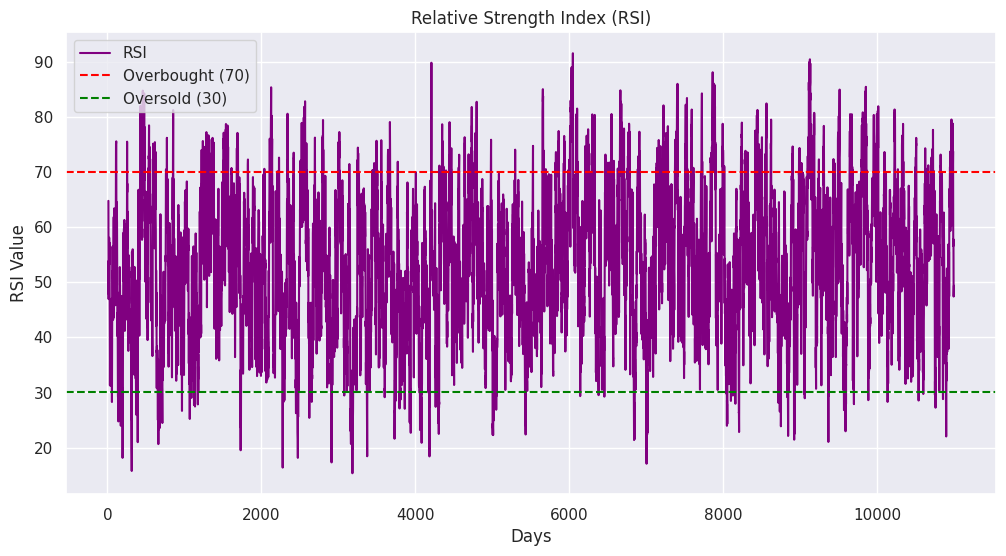

In [59]:
# Plot 3: RSI
plt.figure(figsize=(12, 6))
plt.plot(data['rsi'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Days")
plt.ylabel("RSI Value")
plt.legend()
plt.show()

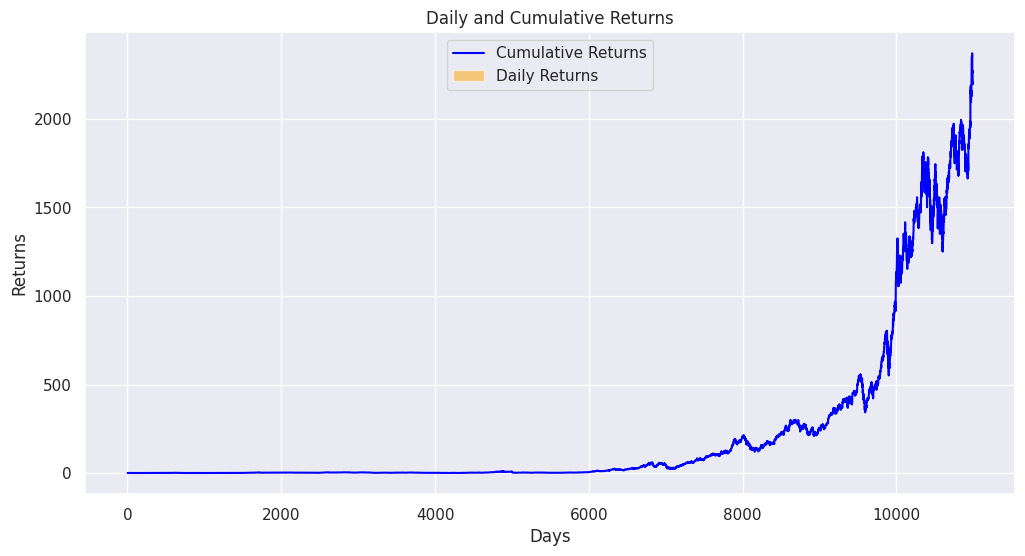

In [60]:
# Plot 4: Daily Returns and Cumulative Returns
plt.figure(figsize=(12, 6))
plt.plot(data['cumulative_return'], label='Cumulative Returns', color='blue')
plt.bar(data.index, data['daily_return'], label='Daily Returns', color='orange', alpha=0.5)
plt.title("Daily and Cumulative Returns")
plt.xlabel("Days")
plt.ylabel("Returns")
plt.legend()
plt.show()

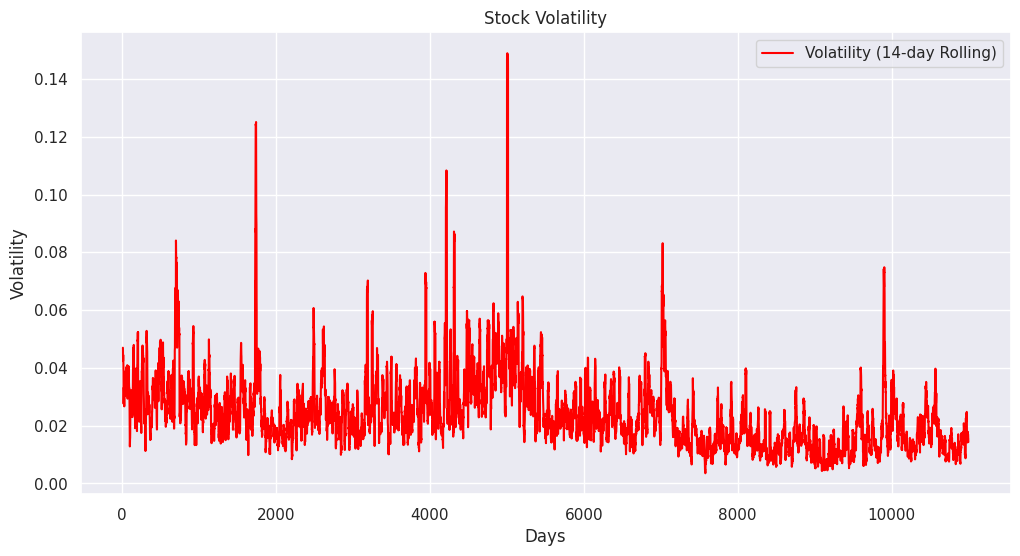

In [61]:
# Plot 5: Volatility
plt.figure(figsize=(12, 6))
plt.plot(data['volatility'], label='Volatility (14-day Rolling)', color='red')
plt.title("Stock Volatility")
plt.xlabel("Days")
plt.ylabel("Volatility")
plt.legend()
plt.show()